In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Data_for_2024.csv"
data = pd.read_csv(file_path)

In [2]:
data.head()

,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
0,1/1/2024,S001,P001,Milk,Dairy,7,NYC,20000,1200,23,5.18,1,Monday,0,0,71.7,1.53,89.1
1,1/1/2024,S001,P002,Lettuce,Produce,5,NYC,20000,1200,15,2.50,0,Monday,0,0,76.4,2.80,84.4
2,1/1/2024,S001,P003,Chicken Breast,Meat,6,NYC,20000,1200,21,5.90,0,Monday,0,0,73.0,0.02,49.6
3,1/1/2024,S001,P004,Greek Yogurt,Dairy,10,NYC,20000,1200,25,5.00,0,Monday,0,0,41.9,3.97,53.8
4,1/1/2024,S001,P005,Strawberries,Produce,4,NYC,20000,1200,15,3.50,0,Monday,0,0,65.4,2.65,45.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                5490 non-null   object 
 1   store_id            5490 non-null   object 
 2   product_id          5490 non-null   object 
 3   name                5490 non-null   object 
 4   category            5490 non-null   object 
 5   shelf_life_days     5490 non-null   int64  
 6   location            5490 non-null   object 
 7   size_sqft           5490 non-null   int64  
 8   avg_daily_footfall  5490 non-null   int64  
 9   units_sold          5490 non-null   int64  
 10  unit_price          5490 non-null   float64
 11  promo               5490 non-null   int64  
 12  day_of_week         5490 non-null   object 
 13  is_weekend          5490 non-null   int64  
 14  is_holiday          5490 non-null   int64  
 15  temperature         5490 non-null   float64
 16  rainfa

In [4]:
data.describe()

,shelf_life_days,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
count,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000,5490.000000
mean,6.400000,17666.666667,1066.666667,19.984699,4.458765,0.206011,0.284153,0.045537,59.791439,1.508845,64.891421
std,2.059314,2054.991834,124.733273,4.513229,1.365605,0.404475,0.451051,0.208498,14.763718,1.500683,14.503053
min,4.000000,15000.000000,900.000000,6.000000,2.000000,0.000000,0.000000,0.000000,7.600000,0.000000,40.000000
25%,5.000000,15000.000000,900.000000,17.000000,3.500000,0.000000,0.000000,0.000000,49.500000,0.440000,52.100000
50%,6.000000,18000.000000,1100.000000,20.000000,5.000000,0.000000,0.000000,0.000000,60.000000,1.040000,64.800000
75%,7.000000,20000.000000,1200.000000,23.000000,5.900000,0.000000,1.000000,0.000000,69.800000,2.130000,77.600000
max,10.000000,20000.000000,1200.000000,37.000000,6.180000,1.000000,1.000000,1.000000,115.400000,13.680000,90.000000


In [5]:
data.isnull().sum()

date                  0
store_id              0
product_id            0
name                  0
category              0
shelf_life_days       0
location              0
size_sqft             0
avg_daily_footfall    0
units_sold            0
unit_price            0
promo                 0
day_of_week           0
is_weekend            0
is_holiday            0
temperature           0
rainfall_mm           0
humidity_percent      0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5490 non-null   datetime64[ns]
 1   store_id            5490 non-null   object        
 2   product_id          5490 non-null   object        
 3   name                5490 non-null   object        
 4   category            5490 non-null   object        
 5   shelf_life_days     5490 non-null   int64         
 6   location            5490 non-null   object        
 7   size_sqft           5490 non-null   int64         
 8   avg_daily_footfall  5490 non-null   int64         
 9   units_sold          5490 non-null   int64         
 10  unit_price          5490 non-null   float64       
 11  promo               5490 non-null   int64         
 12  day_of_week         5490 non-null   object        
 13  is_weekend          5490 non-null   int64       

In [7]:
print(f"Duplicate data: {data.duplicated().sum()}")

Duplicate data: 0


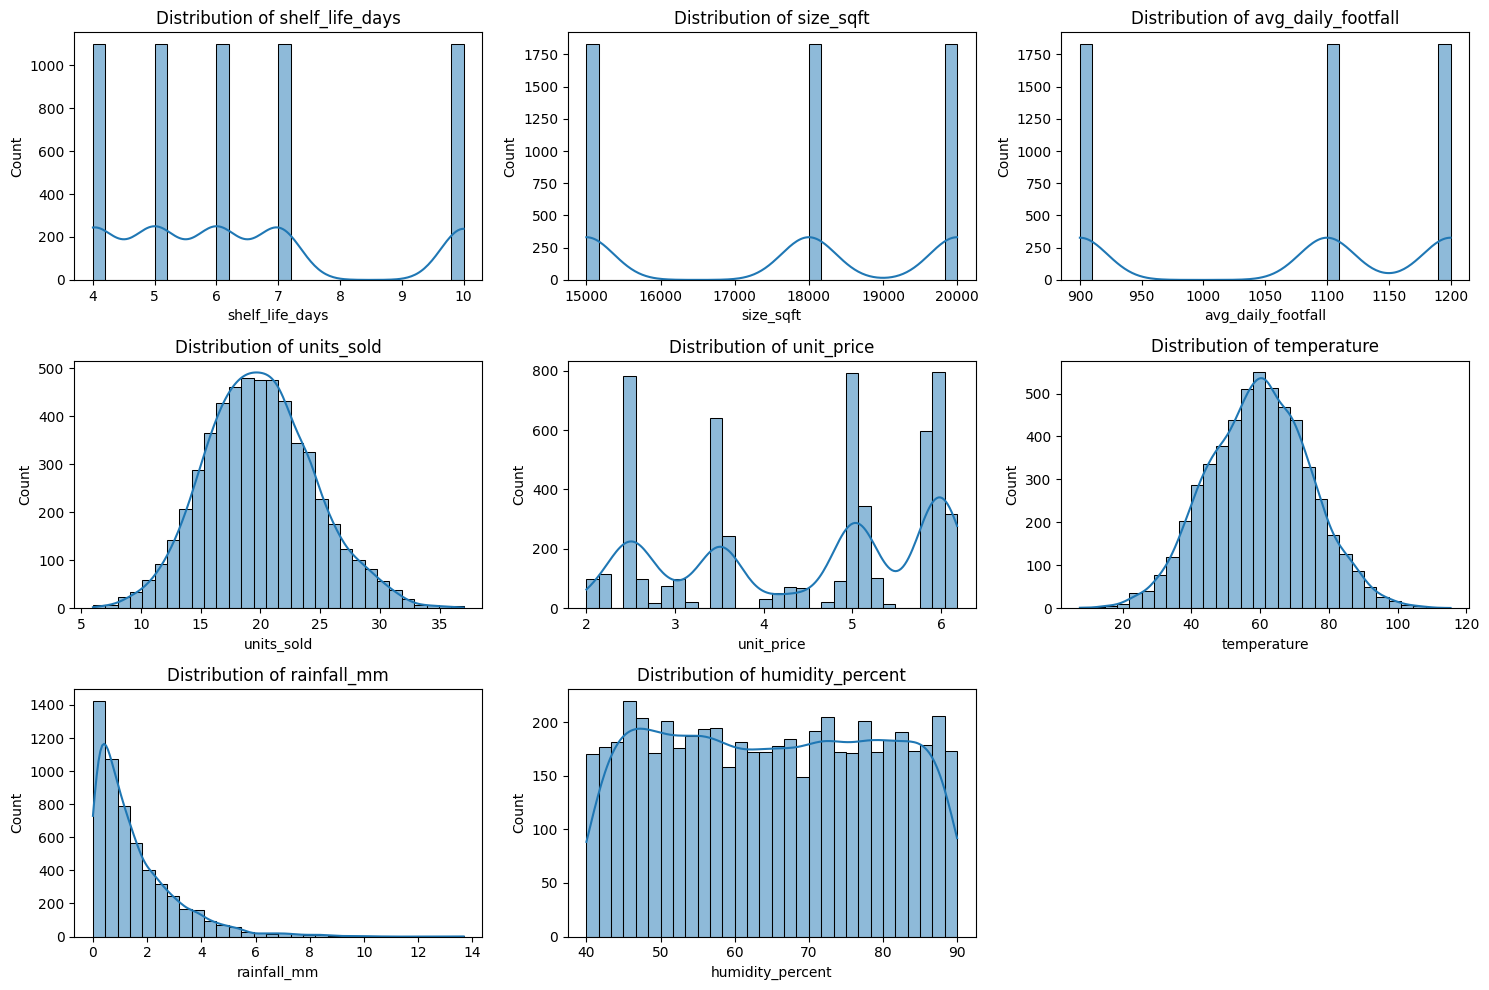

In [8]:
numerical_columns = ['shelf_life_days', 'size_sqft', 'avg_daily_footfall', 
                     'units_sold', 'unit_price', 'temperature', 
                     'rainfall_mm', 'humidity_percent']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

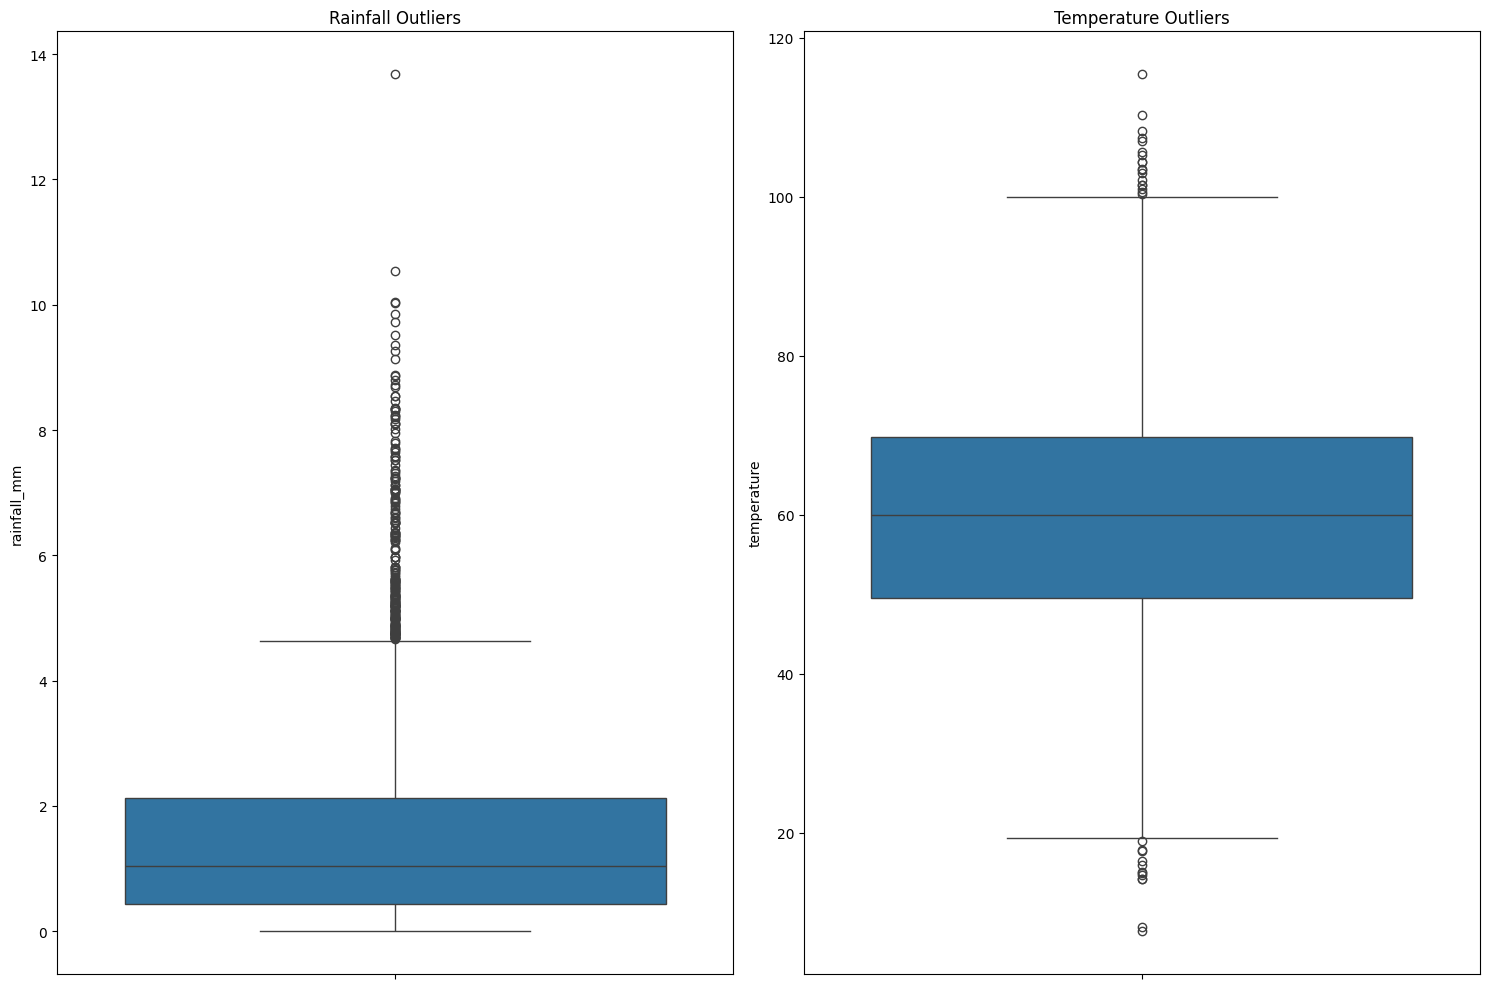

In [9]:
plt.figure(figsize= (15, 10))

plt.subplot(1,2,1)
sns.boxplot(data['rainfall_mm'])
plt.title("Rainfall Outliers")

plt.subplot(1,2,2)
sns.boxplot(data['temperature'])
plt.title("Temperature Outliers")

plt.tight_layout()
plt.show()

In [10]:
rainfall_outliers = data[data['rainfall_mm'] > 8]
print(f"Rainfall outliers: {rainfall_outliers.shape[0]}")
display(rainfall_outliers.head())


Rainfall outliers: 31


,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
130,2024-01-09,S003,P001,Milk,Dairy,7,Chicago,18000,1100,25,5.11,1,Tuesday,0,1,57.5,8.54,70.8
305,2024-01-21,S002,P001,Milk,Dairy,7,Boston,15000,900,21,6.16,0,Sunday,1,0,67.6,8.72,60.8
703,2024-02-16,S003,P004,Greek Yogurt,Dairy,10,Chicago,18000,1100,17,4.43,1,Friday,0,0,51.1,8.30,40.2
1296,2024-03-27,S002,P002,Lettuce,Produce,5,Boston,15000,900,33,2.50,0,Wednesday,0,0,41.5,9.51,67.3
1645,2024-04-19,S003,P001,Milk,Dairy,7,Chicago,18000,1100,28,6.00,0,Friday,0,0,38.3,8.88,65.2


In [11]:
temp_outliers = data[data['temperature'] > 100]
print(f"Number of temperature outliers: {temp_outliers.shape[0]}")
display(temp_outliers.head())

Number of temperature outliers: 18


,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
429,2024-01-29,S002,P005,Strawberries,Produce,4,Boston,15000,900,16,3.50,0,Monday,0,0,105.6,1.53,73.7
582,2024-02-08,S003,P003,Chicken Breast,Meat,6,Chicago,18000,1100,18,5.90,0,Thursday,0,0,103.0,1.24,68.9
1899,2024-05-06,S002,P005,Strawberries,Produce,4,Boston,15000,900,16,3.50,0,Monday,0,0,108.2,2.06,45.6
2089,2024-05-19,S001,P005,Strawberries,Produce,4,NYC,20000,1200,20,3.58,0,Sunday,1,0,104.4,0.03,47.2
2290,2024-06-01,S003,P001,Milk,Dairy,7,Chicago,18000,1100,27,5.29,1,Saturday,1,0,100.3,2.00,45.6


## Not worth changing as ocassional spikes can happen in temperature

In [12]:
print("Number of records above 100°F:", data[data['temperature'] > 100].shape[0])
print("Number of records above 105°F:", data[data['temperature'] > 105].shape[0])
print("Number of records above 110°F:", data[data['temperature'] > 110].shape[0])

data[data['temperature'] > 100].head()


Number of records above 100°F: 18
Number of records above 105°F: 7
Number of records above 110°F: 2


,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
429,2024-01-29,S002,P005,Strawberries,Produce,4,Boston,15000,900,16,3.50,0,Monday,0,0,105.6,1.53,73.7
582,2024-02-08,S003,P003,Chicken Breast,Meat,6,Chicago,18000,1100,18,5.90,0,Thursday,0,0,103.0,1.24,68.9
1899,2024-05-06,S002,P005,Strawberries,Produce,4,Boston,15000,900,16,3.50,0,Monday,0,0,108.2,2.06,45.6
2089,2024-05-19,S001,P005,Strawberries,Produce,4,NYC,20000,1200,20,3.58,0,Sunday,1,0,104.4,0.03,47.2
2290,2024-06-01,S003,P001,Milk,Dairy,7,Chicago,18000,1100,27,5.29,1,Saturday,1,0,100.3,2.00,45.6


In [13]:
data.to_csv('Cleaned_Perishable_Data.csv', index=False)

# Feature Engineering and Prediction

In [16]:
data = data.sort_values(by=['store_id', 'product_id', 'date']).reset_index(drop=True)

In [17]:
data.head()

,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,unit_price,promo,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent
0,2024-01-01,S001,P001,Milk,Dairy,7,NYC,20000,1200,23,5.18,1,Monday,0,0,71.7,1.53,89.1
1,2024-01-02,S001,P001,Milk,Dairy,7,NYC,20000,1200,14,5.05,1,Tuesday,0,0,63.7,2.24,70.1
2,2024-01-03,S001,P001,Milk,Dairy,7,NYC,20000,1200,17,5.02,1,Wednesday,0,0,57.5,0.29,88.8
3,2024-01-04,S001,P001,Milk,Dairy,7,NYC,20000,1200,17,6.00,0,Thursday,0,0,46.9,0.37,64.8
4,2024-01-05,S001,P001,Milk,Dairy,7,NYC,20000,1200,18,6.00,0,Friday,0,0,26.7,1.57,81.5


In [20]:
data['units_sold_lag_1'] = data.groupby(['store_id', 'product_id'])['units_sold'].shift(1)
data['units_sold_lag_7'] = data.groupby(['store_id', 'product_id'])['units_sold'].shift(7)

In [21]:
data['rolling_mean_7'] = (
    data.groupby(['store_id', 'product_id'])['units_sold']
    .shift(1)
    .rolling(window=7)
    .mean()
)

In [22]:
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)


In [23]:
data.head()

,date,store_id,product_id,name,category,shelf_life_days,location,size_sqft,avg_daily_footfall,units_sold,...,day_of_week,is_weekend,is_holiday,temperature,rainfall_mm,humidity_percent,units_sold_lag_1,units_sold_lag_7,rolling_mean_7,month
0,2024-01-01,S001,P001,Milk,Dairy,7,NYC,20000,1200,23,...,0,0,0,71.7,1.53,89.1,NaN,NaN,NaN,1
1,2024-01-02,S001,P001,Milk,Dairy,7,NYC,20000,1200,14,...,1,0,0,63.7,2.24,70.1,23.0,NaN,NaN,1
2,2024-01-03,S001,P001,Milk,Dairy,7,NYC,20000,1200,17,...,2,0,0,57.5,0.29,88.8,14.0,NaN,NaN,1
3,2024-01-04,S001,P001,Milk,Dairy,7,NYC,20000,1200,17,...,3,0,0,46.9,0.37,64.8,17.0,NaN,NaN,1
4,2024-01-05,S001,P001,Milk,Dairy,7,NYC,20000,1200,18,...,4,0,0,26.7,1.57,81.5,17.0,NaN,NaN,1


In [24]:
data = data.dropna().reset_index(drop=True)

In [25]:
split_date = '2024-04-01'
train = data[data['date'] < split_date]
test = data[data['date'] >= split_date]

In [26]:
X_train = train.drop(columns=['units_sold', 'date'])
y_train = train['units_sold']

X_test = test.drop(columns=['units_sold', 'date'])
y_test = test['units_sold']

# LightGBM is used for its wide acceptance in grocery retail industry

In [27]:
from lightgbm import LGBMRegressor

In [28]:
model = LGBMRegressor(
    n_estimators=100,      # Number of trees to build (more = better, but slower)
    learning_rate=0.1,     # Step size between trees (lower = slower but often better)
    max_depth=5,           # Max depth of trees to avoid overfitting
    random_state=42        # For consistent results every time you run it
)

In [30]:
for col in ['store_id', 'product_id', 'name', 'category', 'location']:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

In [31]:
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 20
[LightGBM] [Info] Start training from score 19.905556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=5, random_state=42)

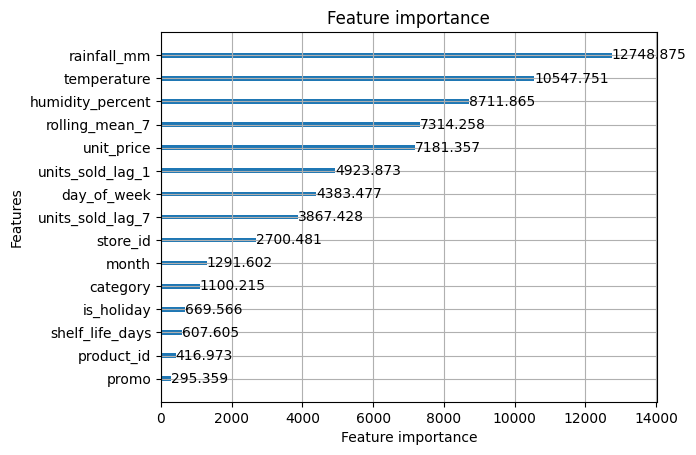

In [33]:
import matplotlib.pyplot as plt
import lightgbm as lgb

lgb.plot_importance(model, max_num_features=15, importance_type='gain')
plt.show()


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 3.76
RMSE: 4.74


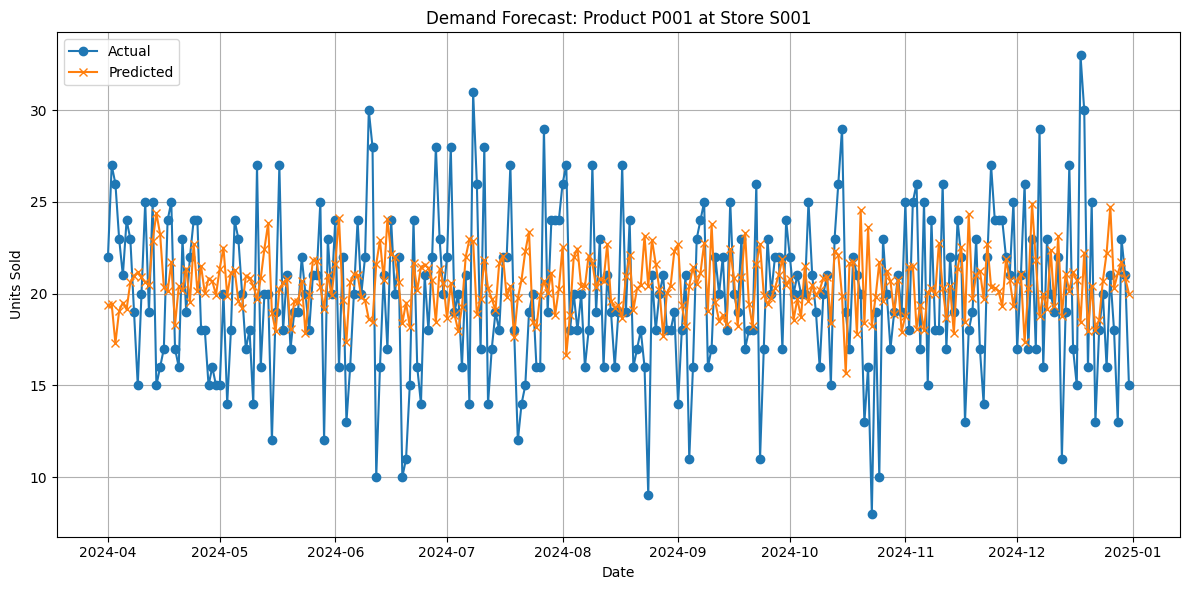

In [36]:
import matplotlib.pyplot as plt

# Pick one product and store for visualization
sample_product = X_test['product_id'].iloc[0]
sample_store = X_test['store_id'].iloc[0]

# Get corresponding rows from test set
sample_mask = (X_test['product_id'] == sample_product) & (X_test['store_id'] == sample_store)

# Reattach date and true values
test_subset = X_test[sample_mask].copy()
test_subset['date'] = test[sample_mask]['date']
test_subset['actual_units_sold'] = y_test[sample_mask].values
test_subset['predicted_units_sold'] = y_pred[sample_mask]

# Sort by date for plotting
test_subset = test_subset.sort_values('date')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_subset['date'], test_subset['actual_units_sold'], label='Actual', marker='o')
plt.plot(test_subset['date'], test_subset['predicted_units_sold'], label='Predicted', marker='x')
plt.title(f'Demand Forecast: Product {sample_product} at Store {sample_store}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
